In [1]:
%pip install numpy
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def AFyt(x, t, c):
    '''
    input: 
        x: x coordinate of center line, float
        t: maximum thickness, in fraction of chord length, float
        c: chord lrngth, float
    output:
        half thickness of airfoil at corresponding x coordinate
    '''
    return 5. * t * (0.2969 * ((x/c)**0.5) - 
                     0.126 * (x/c) - 
                     0.3516 * ((x/c)**2) + 
                     0.2843 * ((x/c)**3) - 
                     0.1036 * ((x/c)**4))

(-0.5, 0.5)

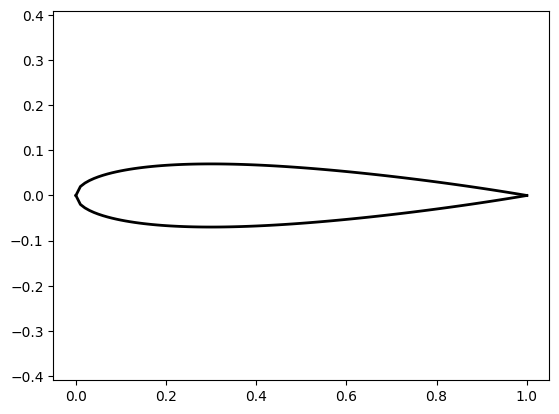

In [4]:
x = np.linspace(0., 1., 101)
plt.plot(x, AFyt(x, 0.14, 1.0), 'k-', lw=2)    # upper surface
plt.plot(x, - AFyt(x, 0.14, 1.0), 'k-', lw=2)  # lower surface
plt.axis('equal'); plt.ylim((-0.5, 0.5))

In [5]:
def AFyc(x, m, p, c):
    '''
    input:
        x: x coordinate of center line, float
        m: the maximum camber (100 m is the first of the four digits), float
        p: location of maximum camber (10 p is the second digit), float
        c: chord lrngth, float
    output:
        y coordinate of center line at corresponding x coordinate
    '''
    if (x >= 0.0) and (x <= p*c):
        return m * x * (2. * p - (x/c)) / (p**2.)
    elif (x > p*c) and (x <= c):
        return m * (c - x) * (1. + (x/c) - 2. * p) / ((1. - p)**2)
    else:
        raise ValueError

In [6]:
def AFth(x, m, p, c):
    '''
    input:
        x: x coordinate of center line, float
        m: the maximum camber (100 m is the first of the four digits), float
        p: location of maximum camber (10 p is the second digit), float
        c: chord lrngth, float
    output:
        angle between center and horizontal line at corresponding x coordinate
    '''
    if (x >= 0.0) and (x <= p*c):
        return np.arctan(2.0 * m * (p - (x/c)) / (p**2))
    elif (x > p*c) and (x <= c):
        return np.arctan(2.0 * m * (p - (x/c)) / ((1. - p)**2))
    else:
        raise ValueError

In [7]:
def AF(x, t, sign, m, p, c):
    '''
    input:
        x: x coordinate of center line, float
        t: maximum thickness, in fraction of chord length, float
        sign: indicate upper (1) or lower (-1) surface of airfoil
        m: the maximum camber (100 m is the first of the four digits), float
        p: location of maximum camber (10 p is the second digit), float
        c: chord lrngth, float
    output:
        x, y coordinates on airfoil surface at corresponding 
        center line x coordinate
    '''
    if (m == 0.) or (p == 0):
        return x, sign * AFyt(x, t, c)
    else:
        return np.array([x[i] - 
                         sign * AFyt(x[i], t, c) * np.sin(AFth(x[i], m, p, c)) 
                         for i in range(np.size(x))]), \
               np.array([AFyc(x[i], m, p, c) + 
                         sign * AFyt(x[i], t, c) * np.cos(AFth(x[i], m, p, c))
                         for i in range(np.size(x))])

x: [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]


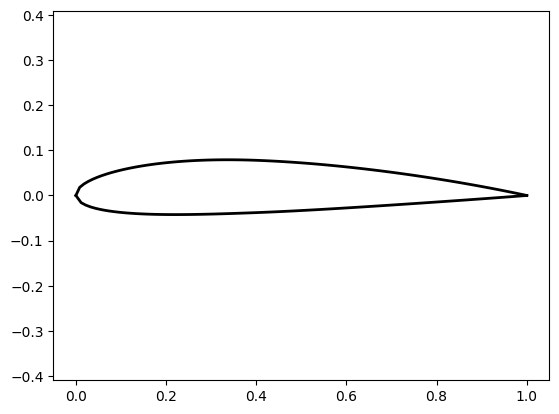

In [8]:
x = np.linspace(0., 1., 101)
xU, yU = AF(x, 0.12, 1, 0.02, 0.4, 1.0)
xL, yL = AF(x, 0.12, -1, 0.02, 0.4, 1.0)
plt.plot(xU, yU, 'k-', lw=2)
plt.plot(xL, yL, 'k-', lw=2)
plt.axis('equal'); plt.ylim((-0.5, 0.5))
print("x:",str(x))

In [9]:
Nxi = 51
Neta = 21
eta, xi = np.meshgrid(np.linspace(0, Neta-1, Neta), np.linspace(0, Nxi-1, Nxi))

In [10]:
def plotMesh(x, y):
    for i in range(Nxi):
        plt.plot(x[i, :], y[i, :], 'k.-', lw=2)
    for i in range(Neta):
        plt.plot(x[:, i], y[:, i], 'k.-', lw=2)

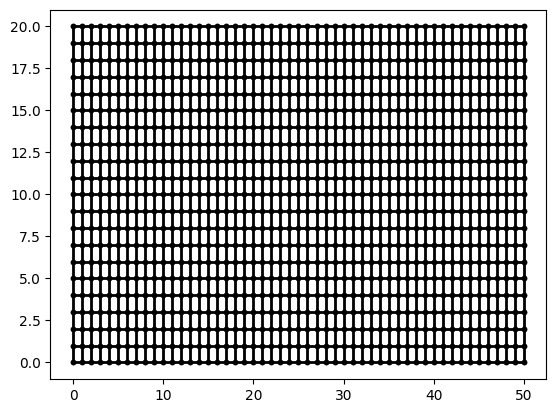

In [11]:
plotMesh(xi, eta)


In [12]:
rBC = 5.0    # the radius of outer boundary
m, p, t, c = 0.02, 0.4, 0.12, 1.0    # parameters of NACA 2412 airfoil

# Initialize x[i, j] and y[i, j]
x = np.empty((Nxi, Neta))
y = np.empty((Nxi, Neta))

# Generate grid points on airfoil surface
Nxc = (Nxi-1)/2 + 1
Nxc = int(Nxc)
xc = np.linspace(0., 1., Nxc)
xU, yU = AF(xc, 0.12, 1, 0.02, 0.4, 1.0)
xL, yL = AF(xc, 0.12, -1, 0.02, 0.4, 1.0)

# Set x_{i, j=0} and y_{i, j=0}
x[:Nxc, 0] = xL[-1::-1].copy()
x[Nxc:, 0] = xU[1:].copy()

y[:Nxc, 0] = yL[-1::-1].copy()
y[Nxc:, 0] = yU[1:].copy()

# Generate grid points on circular outer boundary
# and set x_{i, j=-1}, y_{i, j=-1}
dr = 2. * np.pi / (Nxi -1)
th = - np.array([i * dr for i in range(Nxi)])
x[:, -1] = rBC * np.cos(th) + 0.5 * c
y[:, -1] = rBC * np.sin(th)

In [13]:

for i in range(Nxi):
    x[i, 1:-1] = np.linspace(x[i, 0], x[i, -1], Neta)[1:-1]
    y[i, 1:-1] = np.linspace(y[i, 0], y[i, -1], Neta)[1:-1]

(-5.0, 5.0)

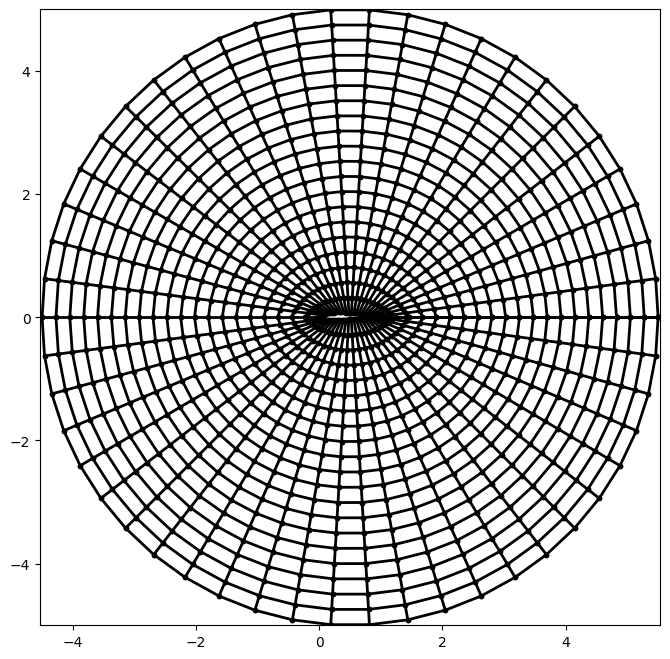

In [14]:
plt.figure(figsize=(8, 8), dpi=100)
plotMesh(x, y)
plt.axis('equal')
plt.xlim((-4.5, 5.5)); plt.ylim((-5, 5))

(-1.0, 1.0)

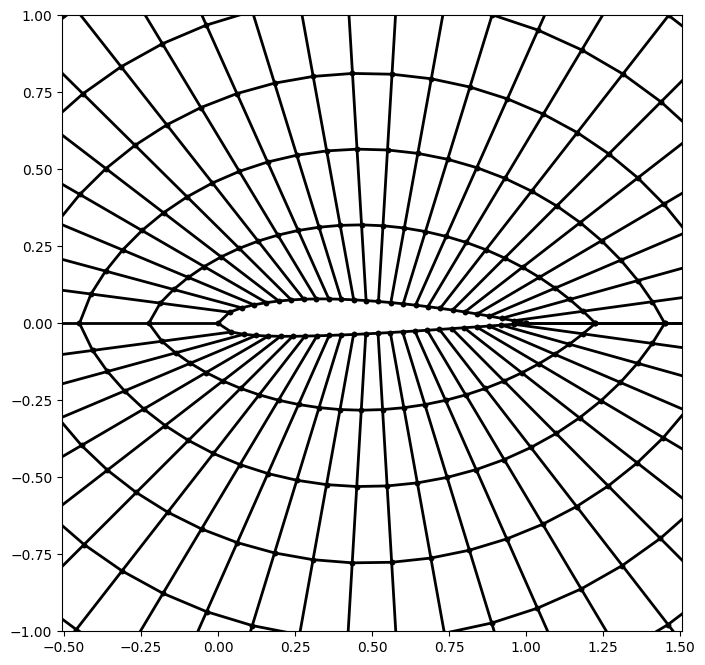

In [15]:
plt.figure(figsize=(8, 8), dpi=100)
plotMesh(x, y)
plt.axis('equal')
plt.xlim((-0.5, 1.5)); plt.ylim((-1, 1))
     

In [16]:
def Solve_a_b_c(x, y):
    '''
    input:
        x: the x coordinate of x_{i=i-1~i+1, j=j-1~j+1}, at least 3x3 array
        y: the y coordinate of y_{i=i-1~i+1, j=j-1~j+1}, at least 3x3 array
    output:
        a, b, c: at least 1x1 float
    '''
    a = 0.25 * (((x[1:-1, 2:] - x[1:-1, :-2])**2) + 
                ((y[1:-1, 2:] - y[1:-1, :-2])**2))
    b = 0.25 * ((x[2:, 1:-1] - x[:-2, 1:-1]) * 
                (x[1:-1, 2:] - x[1:-1, :-2]) + 
                (y[2:, 1:-1] - y[:-2, 1:-1]) * 
                (y[1:-1, 2:] - y[1:-1, :-2]))
    c = 0.25 * (((x[2:, 1:-1] - x[:-2, 1:-1])**2) + 
                ((y[2:, 1:-1] - y[:-2, 1:-1])**2))
    return a, b, c

In [17]:
def SolveEq(a, b, c, U):
    '''
    input:
        a, b, c: as described in the content
        U: the result of the last iteration
    output:
        return the result of current iteration
    '''
    return 0.5 * (
                  a * (U[2:, 1:-1] + U[:-2, 1:-1]) + 
                  c * (U[1:-1, 2:] + U[1:-1, :-2]) -
                  b * 0.5 * (U[2:, 2:] - U[2:, :-2] + U[:-2, :-2] - U[:-2, 2:])
                 ) / (a + c)

In [18]:
iters=0
while True:
    
    # count the number of iterations
    iters += 1
    
    # backup the last result
    xn = x.copy()
    yn = y.copy()
    
    # solve periodic BC first
    tempx = np.append([x[-2, :].copy()], x[0:2, :].copy(), 0) 
    tempy = np.append([y[-2, :].copy()], y[0:2, :].copy(), 0)
    a, b, c = Solve_a_b_c(tempx, tempy)
    x[0, 1:-1] = SolveEq(a, b, c, tempx)
    y[0, 1:-1] = SolveEq(a, b, c, tempy)

    x[-1, 1:-1] = x[0, 1:-1].copy()
    y[-1, 1:-1] = y[0, 1:-1].copy()
    
    # solve interior
    a, b, c = Solve_a_b_c(x, y)
    x[1:-1, 1:-1] = SolveEq(a, b, c, x)
    y[1:-1, 1:-1] = SolveEq(a, b, c, y)
    
    # calculate difference between current and the last result
    errx = np.abs(x - xn)
    erry = np.abs(y - yn)
    
    # adjudge whether the iteration should stop
    if (errx.max() <= 1e-6) and (erry.max() <= 1e-6):
        break

(-5.0, 5.0)

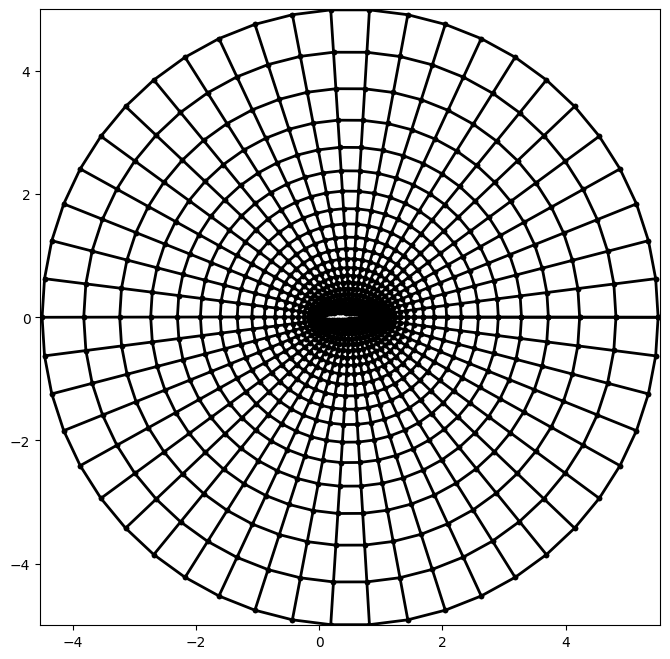

In [19]:
plt.figure(figsize=(8, 8), dpi=100)
plotMesh(x, y)
plt.axis('equal')
plt.xlim((-4.5, 5.5)); plt.ylim((-5, 5))

(-1.0, 1.0)

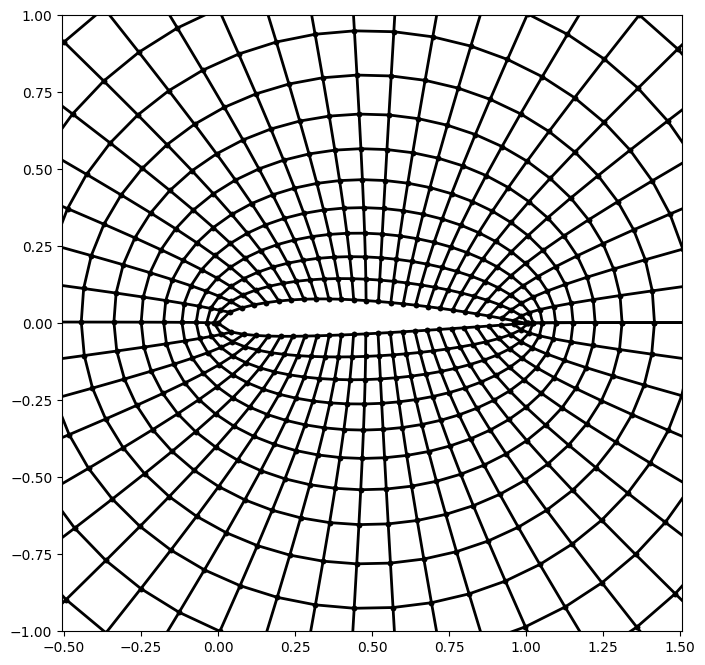

In [20]:
plt.figure(figsize=(8, 8), dpi=100)
plotMesh(x, y)
plt.axis('equal')
plt.xlim((-0.5, 1.5)); plt.ylim((-1, 1))

In [21]:
# set angle of attact
AOA = 15. / 180. * np.pi

# set free stream velocity
Vinf = 70.

# initialize stram functions
stream = np.zeros((Nxi, Neta))

# set up the BCs on the outer boundary
stream[:, -1] = - x[:, -1] * Vinf * np.sin(AOA) + y[:, -1] * Vinf * np.cos(AOA)

# solve the PDE by iterative method
iters = 0
while True:
    
    # count the number of current interation
    iters += 1
    
    # backup the last result
    stream_n = stream.copy()
    
    # apply periodic BC on dividing line
    temp = np.append([stream[-2, :].copy()], stream[:2, :].copy(), 0)
    tempx = np.append([x[-2, :].copy()], x[:2, :].copy(), 0) 
    tempy = np.append([y[-2, :].copy()], y[:2, :].copy(), 0)
    a, b, c = Solve_a_b_c(tempx, tempy)
    stream[0, 1:-1] = SolveEq(a, b, c, temp)
    stream[-1, :] = stream[0, :].copy()
    
    # apply Kutta condition 
    # and set the value of stream function on the airfoil surface
    stream[:, 0] = stream[0, 1]

    # solve interior
    a, b, c = Solve_a_b_c(x, y)
    stream[1:-1, 1:-1] = SolveEq(a, b, c, stream)
    
    # calculate difference between current and the last result
    err = np.abs(stream - stream_n)
    
    # adjudge whether the iteration should stop
    if (err.max() <= 1e-6):
        break

In [22]:
stream = stream - stream[0, 0]


(-1.5, 1.5)

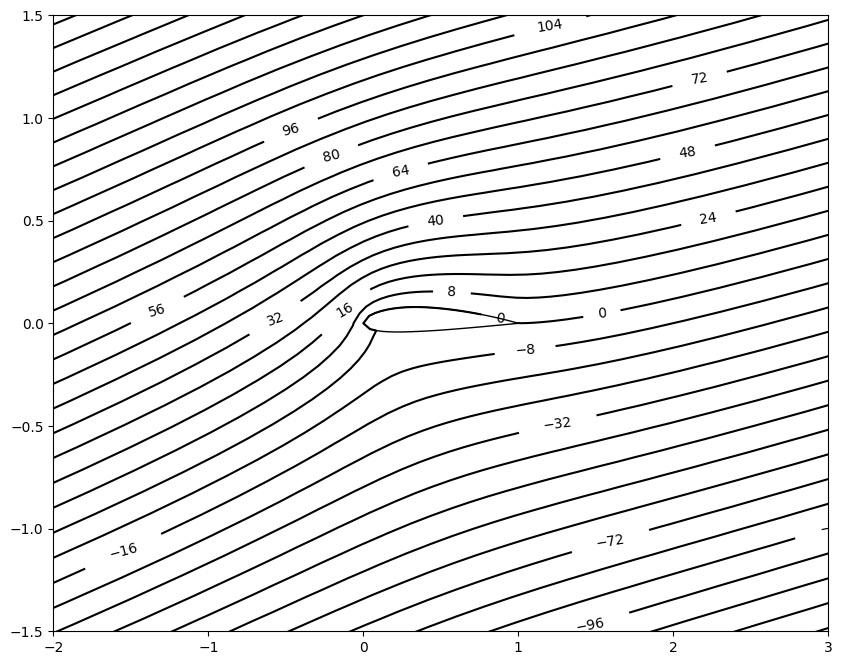

In [23]:
# set the contour lines with negative values to be solid lines
import matplotlib as mpl
mpl.rcParams['contour.negative_linestyle'] = 'solid'

# contour
plt.figure(figsize=(10, 8), dpi=100)
cs = plt.contour(x, y, stream, 100, colors='k')
plt.clabel(cs)
plt.plot(x[:, 0], y[:, 0], 'k-', lw=1) # plot the airfoil
plt.xlim((-2., 3.))
plt.ylim((-1.5, 1.5))

In [24]:
from IPython.core.display import HTML
css_file = '../../styles/numericalmoocstyle.css'
HTML(open(css_file, "r").read())